In [29]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Importing the dataset
dataset = pd.read_csv('/Users/monipeni/Documents/Deep_Learning_A_Z/Volume 2 - Unsupervised Deep Learning/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv')

In [31]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [32]:
X = dataset.iloc[:, :-1].values # we want all the lines. We want all the columns except the last one
y = dataset.iloc[:, -1].values # we only want the last column

In [33]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # we want values between 0 and 1, that´s normalization
X = sc.fit_transform(X)

In [34]:
# Training the SOM:

from minisom import MiniSom

# Create SOM object
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) 
    # the first arguments are the dimensions of the map, as we don´t have many observations, not too much customers
    # in our fraud detection dataset , so we choose 10 by 10 grid.
    # input_len correspond to the number of features we have in our X dataset, because we are training
    # the SOM object on X. X contains 14 attributes and the Customer ID. We don´t need to consider the customer ID
    # because don´t have significance on the patterns, but we are gonna keep it because we want to identify the
    # potential cheaters and for this we will need the Customer ID. So input_len is 14 attributes + CustomerID = 15
    # we mantain the default values for sigma (the radius of the different neighborhoods in the grid) and 
    # learning_rate is the hyper-parameter that decides by how much the weights are updated during each iteration,
    # so the lower is the learning rate, the longer the self-organizing map will take time to be built.

# we need to initialize randomly the values of the weight vectors to small numbers close to 0, and then we can 
# train the whole algorithm
som.random_weights_init(X) # we introduce (X) that is the data that we want to be trained

# Train the self-organizing map object on X
som.train_random(data = X, num_iteration = 100) # 100 it´s the number of iterations we want to repeat steps 4 to 9

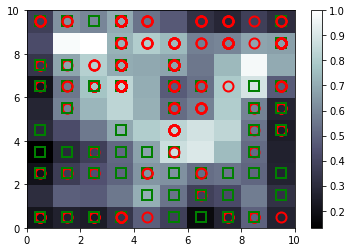

In [35]:
# Visualizing the results

from pylab import bone, pcolor, colorbar, plot, show
bone() # this is the window that will contain the map
pcolor(som.distance_map().T) # T is to take the transpose of the matrix returned by the distance map method
colorbar() # to know what these colors correspond to
markers = ['o', 's'] # we want a circle and a square
colors = ['r', 'g'] # we want to color the markers, in red and green
for i, x in enumerate(X): # i is going to be the different values of all the indexes (0,1,2,3... till 689)
                          # x is going to be different vectors of costumers at the different iterations
                          # enumerate(X), X that contain all our costumers
    w = som.winner(x) # this will get us the winning node of the customer x
    plot(w[0] + 0.5, # this is the x coordinate of the winning node 
         w[1] + 0.5, # this is the y coordinate (we add 0.5 to put the marker in the center of the square)
         markers[y[i]], # i is the index of the customer, y the value of the dependent variable for that customer
                        # that is 0 if the customer didn´t get approval and 1 if get approval
                        # if the customer got approval y i will be equal to 1, so markers are equals to 1 and 
                        # corresponds to square (markers=['o','s']) 0 is 'o' 1 is 's'
         markeredgecolor = colors[y[i]], # we are only color the edge of the marker
         markerfacecolor = 'None', # we don´t colour the inside color
         markersize = 10, # because we want to see the markers
         markeredgewidth = 2) 
show()